### Gastos parlamentares

•	Quais estados/partido gastaram mais por deputado? <br>
•	As medidas estatísticas por estado/partido? <br>
•	Os deputados de estados mais distantes de Brasília gastaram mais com viagem? <br>
•	Gastos com telefone aumentaram durante períodos de turbulência política?

#### Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'dados/dados_consolidados.csv'

#### Remoção de colunas

In [3]:
dfr = pd.read_csv(path)
dfr.columns
dfr.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df = dfr.copy()

#### Analise de partidos e exclusão de erros

In [5]:
partidos = df.sgpartido.unique()
print(f'Numero de partidos: {len(partidos)}\n')
print(partidos)

Numero de partidos: 34

['AVANTE' 'DEM' 'MDB' 'PATRI' 'PCdoB' 'PDT' 'PHS' 'PODE' 'PP' 'PPL' 'PPS'
 'PR' 'PRB' 'PROS' 'PSB' 'PSC' 'PSD' 'PSDB' 'PSL' 'PSOL' 'PT' 'PTB' 'PV'
 'REDE' 'SOLIDARIEDADE' 'NOVO' 'PL' 'REPUBLICANOS' 'PMDB' 'PTdoB'
 'S.PART.' 'SD' 'PRTB' 'PP**']


In [6]:
registros_partido = []
for partido in partidos:
    n_registros = len(df[df['sgpartido']==partido])
    registros_partido.append((partido, n_registros))

df_registros = pd.DataFrame(registros_partido, columns=['partido', 'nregistros'])
df_registros.set_index('partido', inplace=True)

Exclusão dos partidos com menos de 2 mil registros

In [7]:
partidos_menor_2k = df_registros[df_registros['nregistros'] < 200].index
print(partidos_menor_2k)

Index(['NOVO', 'PL', 'REPUBLICANOS', 'PMDB', 'PTdoB', 'S.PART.', 'SD', 'PRTB',
       'PP**'],
      dtype='object', name='partido')


In [8]:
# todos os partidos que tem MAIS de 2 mil registros
# ~ = negacao, 
df1 = df[~df['sgpartido'].isin(partidos_menor_2k)]

#### Quais estados/partido tiveram gastos mais altos por deputado?

Gasto medio por parlamentar por ano para cada partido

In [9]:
def gasto_medio_por_deputado(sub_df):
    return sub_df['vlrliquido'].sum()/sub_df['txnomeparlamentar'].nunique()

gasto_por_deputado = df1.groupby(['numano', 'sgpartido']).apply(gasto_medio_por_deputado).reset_index()
gasto_por_deputado.rename({'sgpartido': 'partido', 0: 'valores'}, axis=1, inplace=True)
gasto_por_deputado.sort_values('valores', inplace=True)
gasto_por_deputado

,numano,partido,valores
118,2019,PSL,8012.981000
123,2019,REDE,9903.550000
122,2019,PV,13846.850000
119,2019,PSOL,19272.720000
114,2019,PSB,22829.554839
...,...,...,...
59,2017,PPL,469560.210000
84,2018,PPL,473913.560000
34,2016,PPL,479766.950000
56,2017,PHS,482048.277500


Representacao visual

<ipython-input-10-9ee19632f19a>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels)


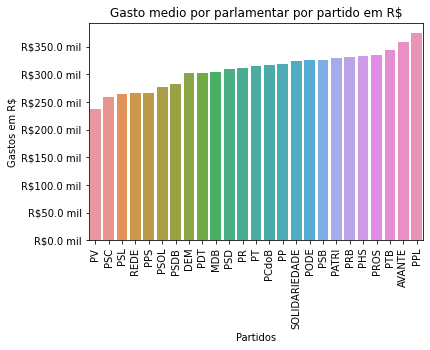

In [10]:
# com media dos anos
data = gasto_por_deputado.groupby(['partido'])['valores'].mean().reset_index().sort_values('valores')
plot = sns.barplot(data=data, x='partido', y='valores')
for index, label in enumerate(plot.get_xticklabels()):
    if index % 1 == 0:
        label.set_rotation(90)
        label.set_visible(True)
    else:
        label.set_visible(False)
plot.set_title('Gasto medio por parlamentar por partido em R$')
plot.set_ylabel('Gastos em R$')
plot.set_xlabel('Partidos')

ylabels = [f'R${n/1000} mil' for n in plot.get_yticks()]
plot.set_yticklabels(ylabels)
plt.show()

Gasto medio por estado

In [11]:
gasto_por_estado = df1.groupby(['numano', 'sguf']).apply(gasto_medio_por_deputado).reset_index()
gasto_por_estado.rename({'sguf': 'estado', 0: 'valores'}, axis=1, inplace=True)
gasto_por_estado.sort_values('valores', inplace=True)
print(gasto_por_estado)

     numano estado        valores
131    2019     SC   16253.974737
130    2019     RS   20816.664286
116    2019     GO   22077.781111
115    2019     ES   22701.162500
125    2019     PR   22958.742647
..      ...    ...            ...
74     2017     RO  520767.360000
102    2018     RR  525015.232500
48     2016     RR  532756.470000
54     2017     AC  535202.103750
75     2017     RR  544610.085000

[135 rows x 3 columns]


<ipython-input-12-c282917da252>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels)


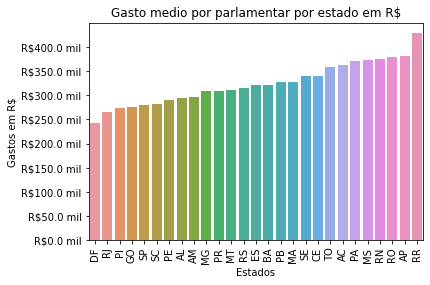

In [12]:
data = gasto_por_estado.groupby('estado')['valores'].mean().reset_index().sort_values('valores')
plot = sns.barplot(data=data, x='estado', y='valores')
for index, label in enumerate(plot.get_xticklabels()):
    if index % 1 == 0:
        label.set_rotation(90)
        label.set_visible(True)
    else:
        label.set_visible(False)
plot.set_title('Gasto medio por parlamentar por estado em R$')
plot.set_ylabel('Gastos em R$')
plot.set_xlabel('Estados')

ylabels = [f'R${n/1000} mil' for n in plot.get_yticks()]
plot.set_yticklabels(ylabels)
plt.show()

#### As medidas estatísticas por estado/partido
    Valor maximo e minimo
    Media, mediana, moda
    Desvio padrao

In [13]:
from statistics import mean, stdev, median, mode

Por partido

In [14]:
df1.groupby(['sgpartido'])['vlrliquido'].agg([max, min, mean, median, mode, stdev])

,max,min,mean,median,mode,stdev
sgpartido,,,,,,
AVANTE,180000.00,-3264.67,5733.001340,3838.760,5000.0,9483.059922
DEM,154310.00,-14257.52,4552.147892,2197.250,10000.0,6799.061480
MDB,187618.00,-25742.97,4545.646654,2371.945,6000.0,6715.042346
PATRI,198500.00,-281.54,4319.175163,2073.190,8000.0,7485.794136
PCdoB,89492.00,-1797.64,4755.302610,2869.175,5000.0,6466.040723
PDT,122001.70,-8325.79,4654.435437,2589.835,6000.0,6751.969714
PHS,73700.00,-892.73,5037.818329,2715.000,6800.0,7254.211043
PODE,109400.00,-3483.24,4784.732702,2442.880,10000.0,7171.411319
PP,189600.00,-10975.02,4736.481187,2212.610,10000.0,7173.807349


Por estado

In [15]:
df1.groupby(['sguf'])['vlrliquido'].agg([max, min, mean, median, mode, stdev])

,max,min,mean,median,mode,stdev
sguf,,,,,,
AC,91400.00,-6753.84,5190.284889,2632.830,6000.0,7350.723393
AL,180000.00,-3506.86,5698.611083,2771.040,10000.0,10478.327525
AM,101300.00,-1301.93,6399.811596,2780.370,5000.0,9408.889472
AP,86000.00,-3483.24,6223.752001,3742.000,8000.0,7874.064284
BA,139300.00,-10975.02,4594.112726,2524.740,10000.0,6810.857524
CE,80000.00,-3687.17,5260.032294,3043.905,6000.0,6646.976003
DF,92000.00,1.40,5027.121880,1863.780,6500.0,8419.143586
ES,103000.00,1.30,4657.637660,2905.440,6000.0,7407.013801
GO,116000.00,-1690.78,4620.945407,2597.115,6000.0,6187.599132


#### Os deputados de estados mais distantes de Brasília gastaram mais com viagens?

Categorias de gastos

In [16]:
print(df1['txtdescricao'].unique())

['COMBUSTÍVEIS E LUBRIFICANTES.' 'Emissão Bilhete Aéreo'
 'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES' 'SERVIÇOS POSTAIS'
 'TELEFONIA' 'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.'
 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.'
 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR'
 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR'
 'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO'
 'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS'
 'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.'
 'PASSAGENS AÉREAS'
 'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.'
 'ASSINATURA DE PUBLICAÇÕES' 'LOCAÇÃO OU FRETAMENTO DE AERONAVES'
 'PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR'
 'LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES']


In [17]:
gastos_aereos = ['PASSAGENS AÉREAS', 'Emissão Bilhete Aéreo', 'LOCAÇÃO OU FRETAMENTO DE AERONAVES']

In [18]:
# filtrar a coluna 'txtdescricao' pelos valores da lista 'gastos_aereos', depois agrupar por estado (coluna 'sguf')
# em seguida, aplicar a funcao para calculo de valor medio por deputado (.apply(gasto_medio_por_deputado))
# depois ordernar em ordem crescente (.sort_values())
df1[df1['txtdescricao'].isin(gastos_aereos)].groupby(['sguf']).apply(gasto_medio_por_deputado).sort_values()

sguf
DF     19036.313333
GO     82202.095294
TO    227320.391000
MS    248931.558333
ES    267403.860000
AP    288201.831000
PE    291247.951667
SE    292331.738889
PB    295238.821875
SC    295249.258261
MA    306258.353333
BA    334399.000000
MG    340114.832969
AL    342642.990000
PR    342657.956053
RJ    347387.372787
SP    369125.325172
MT    376956.606364
RS    382380.315581
CE    408084.490000
RN    411835.331111
RO    416984.916000
AC    439376.400909
PI    451675.622143
PA    512308.135238
AM    513938.044615
RR    517067.352500
dtype: float64

####  Gastos com telefone aumentaram durante períodos de turbulência política?

In [19]:
gastos_telefone = ['TELEFONIA']

In [20]:
data = df1[df1['txtdescricao'].isin(gastos_telefone)].groupby(['numano', 'nummes'])['vlrliquido'].sum().reset_index()
print(data)

    numano  nummes  vlrliquido
0     2015       2   952605.68
1     2015       3  1131454.49
2     2015       4  1120572.79
3     2015       5  1115899.44
4     2015       6  1167072.96
5     2015       7  1182344.40
6     2015       8  1223024.81
7     2015       9  1202772.70
8     2015      10  1030657.64
9     2015      11   989845.03
10    2015      12   885744.66
11    2016       1   920236.95
12    2016       2   985159.25
13    2016       3  1090505.68
14    2016       4  1025981.34
15    2016       5  1023106.40
16    2016       6   993004.23
17    2016       7  1003772.65
18    2016       8   984773.46
19    2016       9   931685.48
20    2016      10   936241.12
21    2016      11   874453.23
22    2016      12   802029.96
23    2017       1   807066.73
24    2017       2   852553.74
25    2017       3   887729.40
26    2017       4   855611.06
27    2017       5   889301.05
28    2017       6   853983.91
29    2017       7   847669.83
30    2017       8   844279.22
31    20

IMPEACHMENT DE DILMA ROUSSEFF


<ipython-input-21-2946f16ee5bf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels) # //


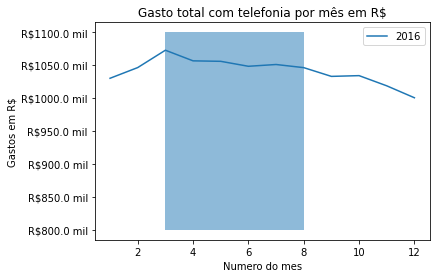

<ipython-input-21-2946f16ee5bf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels) # //


REFORMA DA PREVIDENCIA


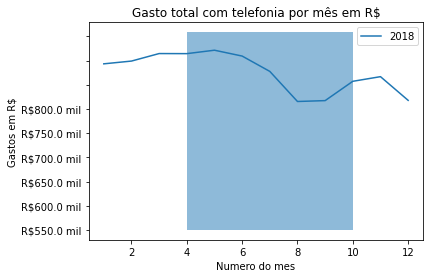

In [21]:
anos = {2016: ((3, 8), "IMPEACHMENT DE DILMA ROUSSEFF"),
        2018: ((4, 10), "REFORMA DA PREVIDENCIA")
}

for ano, fato in anos.items():
    temp_data = data[data['numano'] == ano]
    plot = sns.lineplot(data=temp_data, x='nummes', y='vlrliquido')
 
    plot.set_title('Gasto total com telefonia por mês em R$')
    plot.set_ylabel('Gastos em R$')
    plot.set_xlabel('Numero do mes')
    ylabels = [f'R${n/1000} mil' for n in plot.get_yticks()] # nomes eixo y
    plot.set_yticklabels(ylabels) # //
    plot.legend(labels=[ano]) # legenda

    max_ylabel = temp_data.groupby(['nummes'])['vlrliquido'].sum().max()*1.1
    plot.fill_between(fato[0], max_ylabel, alpha=0.5)
    print(fato[1])
    plt.show()

#### Gastos x total disponivel por mandato

In [22]:
pd.set_option('float_format', '{:f}'.format)

In [23]:
disponivel_mandato = 2160000
print(df1.groupby(['sgpartido'])['txnomeparlamentar'].nunique())
print('')
print(df1.groupby(['sguf'])['txnomeparlamentar'].nunique())

sgpartido
AVANTE            7
DEM              50
MDB              72
PATRI             5
PCdoB            18
PDT              31
PHS               6
PODE             23
PP               67
PPL               1
PPS              12
PR               45
PRB              25
PROS             12
PSB              35
PSC              10
PSD              50
PSDB             69
PSL              22
PSOL              6
PT               76
PTB              20
PV                6
REDE              2
SOLIDARIEDADE    12
Name: txnomeparlamentar, dtype: int64

sguf
AC    12
AL    11
AM    13
AP    11
BA    46
CE    29
DF    11
ES    13
GO    20
MA    24
MG    68
MS    12
MT    11
PA    22
PB    17
PE    37
PI    16
PR    40
RJ    63
RN     9
RO    11
RR     9
RS    43
SC    23
SE     9
SP    92
TO    10
Name: txnomeparlamentar, dtype: int64


#### Por parlamentar

In [24]:
gastos_disponivel = df1.groupby(['txnomeparlamentar'])['vlrliquido'].sum().to_frame().reset_index()

In [25]:
gastos_disponivel['disponivel_gastos'] = disponivel_mandato-gastos_disponivel['vlrliquido']
gastos_disponivel['porcentagem_utilizada'] = ((gastos_disponivel['vlrliquido']/disponivel_mandato)).astype(float).map(lambda n: '{:.2%}'.format(n))
gastos_disponivel.rename({'txnomeparlamentar': 'parlamentar', 'vlrliquido': 'total_gastos'}, axis=1)

,parlamentar,total_gastos,disponivel_gastos,porcentagem_utilizada
0,ABEL MESQUITA JR.,2138921.680000,21078.320000,99.02%
1,ADAIL CARNEIRO,1820391.700000,339608.300000,84.28%
2,ADALBERTO CAVALCANTI,1980565.880000,179434.120000,91.69%
3,ADELMO CARNEIRO LEÃO,1660154.230000,499845.770000,76.86%
4,ADELSON BARRETO,1227712.050000,932287.950000,56.84%
...,...,...,...,...
677,Zé Carlos,1952665.070000,207334.930000,90.40%
678,Zé Silva,1660151.220000,499848.780000,76.86%
679,ÁTILA A. NUNES,6485.390000,2153514.610000,0.30%
680,Átila Lins,1937042.980000,222957.020000,89.68%


#### Por partido

In [26]:
gastos_disponivel_partido = df1.groupby(['sgpartido'])['vlrliquido'].sum().to_frame()

In [27]:
n_deputados_partido = df1.groupby(['sgpartido'])['txnomeparlamentar'].nunique()

In [28]:
disponivel_por_partido = disponivel_mandato*n_deputados_partido

In [29]:
gastos_disponivel_partido['disponivel_gastos'] = disponivel_por_partido - gastos_disponivel_partido['vlrliquido']
gastos_disponivel_partido['porcentagem_utilizada'] = ((gastos_disponivel_partido['vlrliquido']/disponivel_por_partido)).astype(float).map(lambda n: '{:.2%}'.format(n))
gastos_disponivel_partido['n_parlamentares'] = n_deputados_partido

gastos_disponivel_partido.rename({'txnomeparlamentar': 'parlamentar', 'vlrliquido': 'total_gastos'}, axis=1)


,total_gastos,disponivel_gastos,porcentagem_utilizada,n_parlamentares
sgpartido,,,,
AVANTE,10307936.410000,4812063.590000,68.17%,7
DEM,68619077.330000,39380922.670000,63.54%,50
MDB,93240304.160000,62279695.840000,59.95%,72
PATRI,8223709.510000,2576290.490000,76.15%,5
PCdoB,22045582.900000,16834417.100000,56.70%,18
PDT,35764681.900000,31195318.100000,53.41%,31
PHS,7113399.480000,5846600.520000,54.89%,6
PODE,30512240.440000,19167759.560000,61.42%,23
PP,91764586.510000,52955413.490000,63.41%,67


#### Por estado

In [30]:
gastos_disponivel_estado = df1.groupby(['sguf'])['vlrliquido'].sum().to_frame()

In [31]:
n_deputados_estado = df1.groupby(['sguf'])['txnomeparlamentar'].nunique()

In [32]:
disponivel_por_estado = disponivel_mandato*n_deputados_estado

In [33]:
gastos_disponivel_estado['disponivel_gastos'] = disponivel_por_estado - gastos_disponivel_estado['vlrliquido']
gastos_disponivel_estado['porcentagem_utilizada'] = ((gastos_disponivel_estado['vlrliquido']/disponivel_por_estado)).astype(float).map(lambda n: '{:.2%}'.format(n))
gastos_disponivel_estado['n_parlamentares'] = n_deputados_estado

gastos_disponivel_estado.rename({'txnomeparlamentar': 'parlamentar', 'vlrliquido': 'total_gastos'}, axis=1)

,total_gastos,disponivel_gastos,porcentagem_utilizada,n_parlamentares
sguf,,,,
AC,16167737.430000,9752262.570000,62.38%,12
AL,15363455.480000,8396544.520000,64.66%,11
AM,13957989.090000,14122010.910000,49.71%,13
AP,16113293.930000,7646706.070000,67.82%,11
BA,67602368.770000,31757631.230000,68.04%,46
CE,40681089.760000,21958910.240000,64.94%,29
DF,10536847.460000,13223152.540000,44.35%,11
ES,16460091.490000,11619908.510000,58.62%,13
GO,24759025.490000,18440974.510000,57.31%,20
